In [1]:
import tensorflow as tf
import numpy as np

np.set_printoptions(precision=3)
a = np.array([1, 2, 3], dtype=np.int32)
b = [4, 5, 6]
t_a = tf.convert_to_tensor(a)
t_b = tf.convert_to_tensor(b)
print(t_a)
print(t_b)

tf.Tensor([1 2 3], shape=(3,), dtype=int32)
tf.Tensor([4 5 6], shape=(3,), dtype=int32)


In [2]:
t_ones = tf.ones((2, 3))
t_ones.shape

TensorShape([2, 3])

In [3]:
t_ones.numpy()

array([[1., 1., 1.],
       [1., 1., 1.]], dtype=float32)

In [4]:
const_tensor = tf.constant([1.2, 5, np.pi], dtype=tf.float32)
print(const_tensor)

tf.Tensor([1.2   5.    3.142], shape=(3,), dtype=float32)


In [5]:
t_a_new = tf.cast(t_a, tf.int64)
print(t_a_new.dtype)

<dtype: 'int64'>


In [6]:
t = tf.random.uniform(shape=(3, 5))
t_tr = tf.transpose(t)
print(t.shape, '-->', t_tr.shape)

(3, 5) --> (5, 3)


In [7]:
t = tf.zeros((30,))
t_reshape = tf.reshape(t, shape=(5, 6))
print(t_reshape.shape)

(5, 6)


In [8]:
t = tf.zeros((1, 2, 1, 4, 1))
t_sqz = tf.squeeze(t, axis=(2, 4))
print(t.shape, '-->', t_sqz.shape)

(1, 2, 1, 4, 1) --> (1, 2, 4)


In [9]:
tf.random.set_seed(1)
t1 = tf.random.uniform(shape=(5, 2), minval=-1.0, maxval=1.0)
# print(t1.numpy())
t2 = tf.random.normal(shape=(5, 2), mean=0.0, stddev=1.0)
# print(t2.numpy())
t3 = tf.multiply(t1, t2).numpy()
print(t3)

[[-0.27  -0.874]
 [-0.017 -0.175]
 [-0.296 -0.139]
 [-0.727  0.135]
 [-0.401  0.004]]


In [10]:
t4 = tf.math.reduce_mean(t1, axis=0)
print(t4)

tf.Tensor([0.09  0.207], shape=(2,), dtype=float32)


In [11]:
t5 = tf.linalg.matmul(t1, t2, transpose_b=True)
print(t5.numpy())

[[-1.144  1.115 -0.87  -0.321  0.856]
 [ 0.248 -0.191  0.25  -0.064 -0.331]
 [-0.478  0.407 -0.436  0.022  0.527]
 [ 0.525 -0.234  0.741 -0.593 -1.194]
 [-0.099  0.26   0.125 -0.462 -0.396]]


In [12]:
t6 = tf.linalg.matmul(t1, t2, transpose_a=True)
print(t6.numpy())

[[-1.711  0.302]
 [ 0.371 -1.049]]


In [13]:
norm_t1 = tf.norm(t1, ord=2, axis=1).numpy()
print(norm_t1)

[1.046 0.293 0.504 0.96  0.383]


In [14]:
tf.random.set_seed(1)
t = tf.random.uniform((6,))
print(t.numpy())

[0.165 0.901 0.631 0.435 0.292 0.643]


In [15]:
t_splits = tf.split(t, num_or_size_splits=3)
[item.numpy() for item in t_splits]

[array([0.165, 0.901], dtype=float32),
 array([0.631, 0.435], dtype=float32),
 array([0.292, 0.643], dtype=float32)]

In [16]:
tf.random.set_seed(1)
t = tf.random.uniform((5,))
print(t.numpy())

[0.165 0.901 0.631 0.435 0.292]


In [17]:
t_splits = tf.split(t, num_or_size_splits=[3, 2])
[item.numpy() for item in t_splits]

[array([0.165, 0.901, 0.631], dtype=float32),
 array([0.435, 0.292], dtype=float32)]

In [18]:
A = tf.ones((3,))
B = tf.zeros((2,))
C = tf.concat([A, B], axis=0)
print(C.numpy())

[1. 1. 1. 0. 0.]


In [19]:
A = tf.ones((3,))
B = tf.zeros((3,))
S = tf.stack([A, B], axis=1)
print(S.numpy())

[[1. 0.]
 [1. 0.]
 [1. 0.]]


In [20]:
a = [1.2, 3.4, 7.5, 4.1, 5.0, 1.0]
ds = tf.data.Dataset.from_tensor_slices(a)
print(ds)

<TensorSliceDataset element_spec=TensorSpec(shape=(), dtype=tf.float32, name=None)>


In [21]:
for item in ds:
    print(item)

tf.Tensor(1.2, shape=(), dtype=float32)
tf.Tensor(3.4, shape=(), dtype=float32)
tf.Tensor(7.5, shape=(), dtype=float32)
tf.Tensor(4.1, shape=(), dtype=float32)
tf.Tensor(5.0, shape=(), dtype=float32)
tf.Tensor(1.0, shape=(), dtype=float32)


In [22]:
ds_batch = ds.batch(3)
for i, elem in enumerate(ds_batch, 1):
    print('пaкeт {}:'.format(i), elem.numpy())

пaкeт 1: [1.2 3.4 7.5]
пaкeт 2: [4.1 5.  1. ]


In [23]:
tf.random.set_seed(1)
t_x = tf.random.uniform([4, 3], dtype=tf.float32)
t_y = tf.range(4)
ds_x = tf.data.Dataset.from_tensor_slices(t_x)
ds_y = tf.data.Dataset.from_tensor_slices(t_y)
ds_joint = tf.data.Dataset.zip((ds_x, ds_y))
for example in ds_joint:
    print(' х:', example[0].numpy(),
          ' у:', example[1].numpy())

 х: [0.165 0.901 0.631]  у: 0
 х: [0.435 0.292 0.643]  у: 1
 х: [0.976 0.435 0.66 ]  у: 2
 х: [0.605 0.637 0.614]  у: 3


In [24]:
ds_joint = tf.data.Dataset.from_tensor_slices((t_x, t_y))
for example in ds_joint:
    print(' х:', example[0].numpy(),
          ' у:', example[1].numpy())

 х: [0.165 0.901 0.631]  у: 0
 х: [0.435 0.292 0.643]  у: 1
 х: [0.976 0.435 0.66 ]  у: 2
 х: [0.605 0.637 0.614]  у: 3


In [25]:
ds_trans = ds_joint.map(lambda x, y: (x * 2 - 1.0, y))
for example in ds_trans:
    print(' х:', example[0].numpy(),
          ' у:', example[1].numpy())

 х: [-0.67   0.803  0.262]  у: 0
 х: [-0.131 -0.416  0.285]  у: 1
 х: [ 0.952 -0.13   0.32 ]  у: 2
 х: [0.21  0.273 0.229]  у: 3


In [26]:
tf.random.set_seed(1)
ds = ds_joint.shuffle(buffer_size=len(t_x))
for example in ds:
    print(' х:', example[0].numpy(),
          ' у:', example[1].numpy())

 х: [0.976 0.435 0.66 ]  у: 2
 х: [0.435 0.292 0.643]  у: 1
 х: [0.165 0.901 0.631]  у: 0
 х: [0.605 0.637 0.614]  у: 3


In [27]:
ds = ds_joint.batch(batch_size=3, drop_remainder=False)
batch_x, batch_y = next(iter(ds))
print('Пакет-х:\n', batch_x.numpy())
print('Пакет-у: ', batch_y.numpy())

Пакет-х:
 [[0.165 0.901 0.631]
 [0.435 0.292 0.643]
 [0.976 0.435 0.66 ]]
Пакет-у:  [0 1 2]


In [28]:
ds = ds_joint.batch(3).repeat(count=2)
for i, (batch_x, batch_y) in enumerate(ds):
    print(i, batch_x.shape, batch_y.numpy())

0 (3, 3) [0 1 2]
1 (1, 3) [3]
2 (3, 3) [0 1 2]
3 (1, 3) [3]


In [29]:
ds = ds_joint.repeat(count=2).batch(3)
for i, (batch_x, batch_y) in enumerate(ds):
    print(i, batch_x.shape, batch_y.numpy())

0 (3, 3) [0 1 2]
1 (3, 3) [3 0 1]
2 (2, 3) [2 3]


In [30]:
tf.random.set_seed(1)
ds = ds_joint.shuffle(4).batch(2).repeat(3)
for i, (batch_x, batch_y) in enumerate(ds):
    print(i, batch_x.shape, batch_y.numpy())

0 (2, 3) [2 1]
1 (2, 3) [0 3]
2 (2, 3) [0 3]
3 (2, 3) [1 2]
4 (2, 3) [3 0]
5 (2, 3) [1 2]


In [31]:
## Порядок 2: создание пакетов -> тасование ->повторение
tf.random.set_seed(1)
ds = ds_joint.batch(2).shuffle(4).repeat(3)
for i, (batch_x, batch_y) in enumerate(ds):
    print(i, batch_x.shape, batch_y.numpy())

0 (2, 3) [0 1]
1 (2, 3) [2 3]
2 (2, 3) [0 1]
3 (2, 3) [2 3]
4 (2, 3) [2 3]
5 (2, 3) [0 1]


In [32]:
import pathlib

imgdir_path = pathlib.Path('cat_dog_images')
file_list = sorted([str(path) for path in
                    imgdir_path.glob('*.jpg')])
file_list

['cat_dog_images\\cat-01.jpg',
 'cat_dog_images\\cat-02.jpg',
 'cat_dog_images\\cat-03.jpg',
 'cat_dog_images\\dog-01.jpg',
 'cat_dog_images\\dog-02.jpg',
 'cat_dog_images\\dog-03.jpg']

Форма изображения:  (900, 1200, 3)
Форма изображения:  (900, 1200, 3)
Форма изображения:  (900, 742, 3)
Форма изображения:  (800, 1200, 3)
Форма изображения:  (800, 1200, 3)
Форма изображения:  (900, 1200, 3)


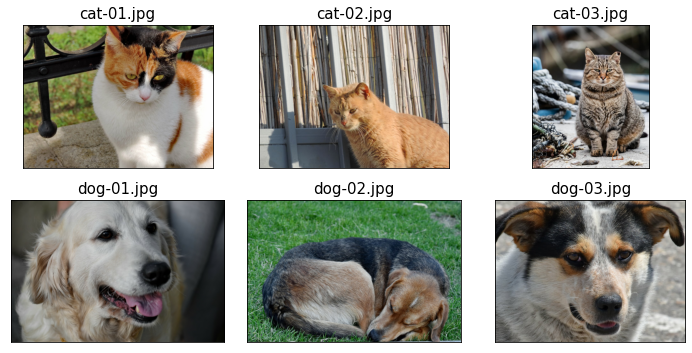

In [33]:
import os
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 5))
for i, file in enumerate(file_list):
    img_raw = tf.io.read_file(file)
    img = tf.image.decode_image(img_raw)
    print('Форма изображения: ', img.shape)
    ax = fig.add_subplot(2, 3, i + 1)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.imshow(img)
    ax.set_title(os.path.basename(file), size=15)
plt.tight_layout()
plt.show()

In [34]:
labels = [1 if 'dog' in os.path.basename(file) else 0 for file in file_list]
print(labels)

[0, 0, 0, 1, 1, 1]


In [35]:
ds_files_labels = tf.data.Dataset.from_tensor_slices((file_list, labels))
for item in ds_files_labels:
    print(item[0].numpy(), item[1].numpy())

b'cat_dog_images\\cat-01.jpg' 0
b'cat_dog_images\\cat-02.jpg' 0
b'cat_dog_images\\cat-03.jpg' 0
b'cat_dog_images\\dog-01.jpg' 1
b'cat_dog_images\\dog-02.jpg' 1
b'cat_dog_images\\dog-03.jpg' 1


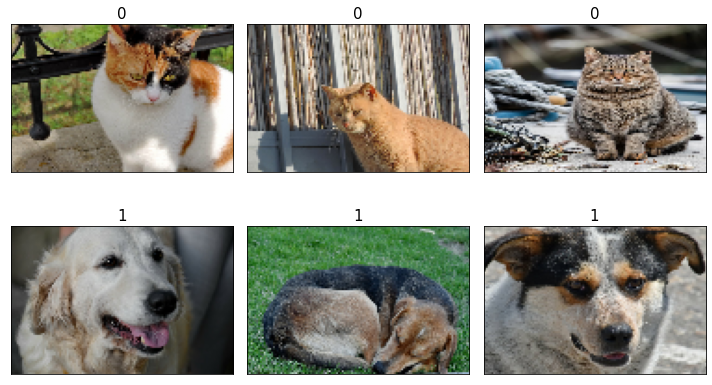

In [36]:
def load_and_preprocess(path, label):
    image = tf.io.read_file(path)
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, [img_height, img_width])
    image /= 255.0
    return image, label


img_width, img_height = 120, 80
ds_images_labels = ds_files_labels.map(load_and_preprocess)

fig = plt.figure(figsize=(10, 6))
for i, example in enumerate(ds_images_labels):
    ax = fig.add_subplot(2, 3, i + 1)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.imshow(example[0])
    ax.set_title('{}'.format(example[1].numpy()), size=15)
plt.tight_layout()
plt.show()

In [37]:
import tensorflow_datasets as tfds

print(len(tfds.list_builders()))
print(tfds.list_builders()[:5])

310
['abstract_reasoning', 'accentdb', 'aeslc', 'aflw2k3d', 'ag_news_subset']


In [38]:
celeba_bldr = tfds.builder('celeb_a')
print(celeba_bldr.info.features)

FeaturesDict({
    'attributes': FeaturesDict({
        '5_o_Clock_Shadow': tf.bool,
        'Arched_Eyebrows': tf.bool,
        'Attractive': tf.bool,
        'Bags_Under_Eyes': tf.bool,
        'Bald': tf.bool,
        'Bangs': tf.bool,
        'Big_Lips': tf.bool,
        'Big_Nose': tf.bool,
        'Black_Hair': tf.bool,
        'Blond_Hair': tf.bool,
        'Blurry': tf.bool,
        'Brown_Hair': tf.bool,
        'Bushy_Eyebrows': tf.bool,
        'Chubby': tf.bool,
        'Double_Chin': tf.bool,
        'Eyeglasses': tf.bool,
        'Goatee': tf.bool,
        'Gray_Hair': tf.bool,
        'Heavy_Makeup': tf.bool,
        'High_Cheekbones': tf.bool,
        'Male': tf.bool,
        'Mouth_Slightly_Open': tf.bool,
        'Mustache': tf.bool,
        'Narrow_Eyes': tf.bool,
        'No_Beard': tf.bool,
        'Oval_Face': tf.bool,
        'Pale_Skin': tf.bool,
        'Pointy_Nose': tf.bool,
        'Receding_Hairline': tf.bool,
        'Rosy_Cheeks': tf.bool,
        'Sidebu

In [39]:
print(celeba_bldr.info.features['image'])

Image(shape=(218, 178, 3), dtype=tf.uint8)


In [40]:
print(celeba_bldr.info.features['attributes'].keys())

dict_keys(['5_o_Clock_Shadow', 'Arched_Eyebrows', 'Attractive', 'Bags_Under_Eyes', 'Bald', 'Bangs', 'Big_Lips', 'Big_Nose', 'Black_Hair', 'Blond_Hair', 'Blurry', 'Brown_Hair', 'Bushy_Eyebrows', 'Chubby', 'Double_Chin', 'Eyeglasses', 'Goatee', 'Gray_Hair', 'Heavy_Makeup', 'High_Cheekbones', 'Male', 'Mouth_Slightly_Open', 'Mustache', 'Narrow_Eyes', 'No_Beard', 'Oval_Face', 'Pale_Skin', 'Pointy_Nose', 'Receding_Hairline', 'Rosy_Cheeks', 'Sideburns', 'Smiling', 'Straight_Hair', 'Wavy_Hair', 'Wearing_Earrings', 'Wearing_Hat', 'Wearing_Lipstick', 'Wearing_Necklace', 'Wearing_Necktie', 'Young'])


In [41]:
print(celeba_bldr.info.citation)

@inproceedings{conf/iccv/LiuLWT15,
  added-at = {2018-10-09T00:00:00.000+0200},
  author = {Liu, Ziwei and Luo, Ping and Wang, Xiaogang and Tang, Xiaoou},
  biburl = {https://www.bibsonomy.org/bibtex/250e4959be61db325d2f02c1d8cd7bfbb/dblp},
  booktitle = {ICCV},
  crossref = {conf/iccv/2015},
  ee = {http://doi.ieeecomputersociety.org/10.1109/ICCV.2015.425},
  interhash = {3f735aaa11957e73914bbe2ca9d5e702},
  intrahash = {50e4959be61db325d2f02c1d8cd7bfbb},
  isbn = {978-1-4673-8391-2},
  keywords = {dblp},
  pages = {3730-3738},
  publisher = {IEEE Computer Society},
  timestamp = {2018-10-11T11:43:28.000+0200},
  title = {Deep Learning Face Attributes in the Wild.},
  url = {http://dblp.uni-trier.de/db/conf/iccv/iccv2015.html#LiuLWT15},
  year = 2015
}


In [42]:
celeba_bldr.download_and_prepare()

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

NonMatchingChecksumError: Artifact https://drive.google.com/uc?export=download&id=0B7EVK8r0v71pZjFTYXZWM3FlRnM, downloaded to C:\Users\maxim.korolev\tensorflow_datasets\downloads\ucexport_download_id_0B7EVK8r0v71pZjFTYXZWM3FlDDaXUAQO8EGH_a7VqGNLRtW52mva1LzDrb-V723OQN8.tmp.8932f4abe4224f4a877cac996c1cd1d0\ServiceLogin, has wrong checksum:
* Expected: UrlInfo(size=1.34 GiB, checksum='46fb89443c578308acf364d7d379fe1b9efb793042c0af734b6112e4fd3a8c74', filename='img_align_celeba.zip')
* Got: UrlInfo(size=92.89 KiB, checksum='0f90c15b41296264fbfce0aa0337b2f84a20cabeda2e97948deb82076fcb02c7', filename='ServiceLogin')
To debug, see: https://www.tensorflow.org/datasets/overview#fixing_nonmatchingchecksumerror